In [1]:
from training_functions import *
from merging import *
from utils import *
from model_evaluation import ModelEvaluation
import pandas as pd

2024-10-21 09:14:30.138366: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 09:14:30.139713: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 09:14:30.168168: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 09:14:30.170140: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-21 09:14:30.911210: W tensorflow/compiler/tf2t

In [3]:
df_kahle_fin_nn = get_nn_features_kahle()

X_kahle_nn = df_kahle_fin_nn.drop([ 
    'src_id',
    'diffusion_mean_cm2_s',
    'stru_label', 
    'stru_id', 
    'structure', 
    'group', 
    'label', 
    'diffusion_sem_cm2_s', 
    'n_Li', 
    'sigma_S_cm', 
    'sigma_S_cm_sem', 
    'sigma_S_cm_err',
 ], axis=1)

df_mpdb_nn = get_nn_features_mpdb()

X_mpdb_nn = df_mpdb_nn.drop([ 
    'material_id',
 ], axis=1)

df_mp_exp = get_nn_features_exp()
X_exp_nn = df_mp_exp.drop(['material_id', 'sample_weight'], axis = 1)


In [4]:
feature_names_nn = X_kahle_nn.columns.tolist()
feature_names_nn = np.array(feature_names_nn)

X_kahle_nn = X_kahle_nn.to_numpy()
X_mpdb_nn = X_mpdb_nn.to_numpy()
X_exp_nn = X_exp_nn.to_numpy()

scaler = StandardScaler().fit(X_mpdb_nn)

X_mpdb_nn = scaler.transform(X_mpdb_nn)
X_kahle_nn = scaler.transform(X_kahle_nn)
X_exp_nn = scaler.transform(X_exp_nn)

cnt_and_name_features_nn = {
    'robust': 3,
    'connected': 16,
    'disconnected': 16
    }

feature_weights_nn = [1 / cnt_and_name_features_nn[(x.split('_')[-2])] for x in feature_names_nn]

In [5]:
df_Kahle2020 = augment_Kahle2020.read_and_augment(
        "data_slim.csv",
    )

preds_Kahle2020 = join_data_and_preds_Kahle2020(
        df_preds=pd.read_csv("datasets/exported.predictions.Kahle2020.v2.csv"),
        df_data=df_Kahle2020,
    )

Estimating lognorm D parameters


Making initial guess:   0%|          | 0/195 [00:00<?, ?it/s]

refining:   0%|          | 0/1000 [00:00<?, ?it/s]

In [9]:
params = {
        "max_depth": 2,
        "learning_rate" : 0.1,
        "iterations": 40,
    }

pipeline_catboost = ModelEvaluation(df_kahle_fin_nn, preds_Kahle2020, model_name = 'catboost', params = params)
pipeline_catboost.fit(X_kahle_nn, feature_weights_nn, thr_positive = 1e-1, thr_negative = 1e-2, threshold = 1e-2, feature_names = feature_names_nn)

pipeline_catboost.evaluate(num_of_evaluations = 10, X_mpdb = X_mpdb_nn, X_exp = X_exp_nn)
pipeline_catboost.get_aggregated_statistics()


[4293 4756 5425 2009 9737 8649 6599 6800 7124 4023]
[4293 4756 5425 2009 9737 8649 6599 6800 7124 4023]


  0%|          | 0/10 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.8682246024018176
test roc-auc mean: 0.729344020529133, std: 0.05545587993129454
mean train roc-auc: 0.8662840355729543


  0%|          | 0/1000 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:04<00:42,  4.75s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 20%|██        | 2/10 [00:09<00:37,  4.67s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 30%|███       | 3/10 [00:15<00:36,  5.24s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 40%|████      | 4/10 [00:20<00:30,  5.04s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 50%|█████     | 5/10 [00:24<00:24,  4.87s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 60%|██████    | 6/10 [00:29<00:19,  4.76s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 70%|███████   | 7/10 [00:33<00:14,  4.69s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 80%|████████  | 8/10 [00:38<00:09,  4.66s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 90%|█████████ | 9/10 [00:43<00:04,  4.69s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:48<00:00,  4.89s/it]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [10]:
pipeline_catboost.show_results()

,statistic,result
0,mean train roc-auc averaged by 10 models,0.867123
1,roc_auc on test by aggregated preds,0.711722
2,mean test roc-auc averaged by 10 models,0.708421
3,roc_like_comparison by aggregated preds,77.267156
4,roc_like_comparison averaged by 10 models,75.333371
5,roc_like_comparison std,5.145744


In [6]:
import warnings
warnings.filterwarnings("ignore")

params = {
    'penalty': 'l2',
    'cv': 3, 
    'scoring': 'roc_auc',
    "solver": "liblinear",
}


for i in range(3):
    pipeline_logreg_l2_liblinear = ModelEvaluation(df_kahle_fin_nn, preds_Kahle2020, model_name = 'logreg', params = params)
    pipeline_logreg_l2_liblinear.fit(X_kahle_nn, feature_weights_nn, thr_positive = 1e-1, thr_negative = 1e-2, threshold = 1e-2, feature_names = feature_names_nn)

    pipeline_logreg_l2_liblinear.evaluate_with_cv(num_of_evaluations = 3, X_mpdb = X_mpdb_nn, X_exp = X_exp_nn)
    pipeline_logreg_l2_liblinear.get_aggregated_statistics()

    preds_logreg_kahle = pipeline_logreg_l2_liblinear.preds_kahle_averaged[-1]
    preds_logreg_mpdb = pipeline_logreg_l2_liblinear.preds_mpdb_averaged[-1]
    preds_logreg_exp = pipeline_logreg_l2_liblinear.preds_exp_averaged[-1]

    print(pipeline_logreg_l2_liblinear.show_results().to_markdown())
    np.save(f'predictions_regression_cv_check/nn_logreg_l2_liblinear_kahle_{i}.npy', preds_logreg_kahle)
    np.save(f'predictions_regression_cv_check/nn_logreg_l2_liblinear_mpdb_{i}.npy', preds_logreg_mpdb)
    np.save(f'predictions_regression_cv_check/nn_logreg_l2_liblinear_exp_{i}.npy', preds_logreg_exp)


[2979  692 6070]


  0%|          | 0/3 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.7896786757546251
test roc-auc mean: 0.6928610030535883, std: 0.06725464254820984
mean train roc-auc: 0.7952012171667457


  0%|          | 0/1000 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:10<00:21, 10.52s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [00:20<00:10, 10.38s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:32<00:00, 10.79s/it]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

|    | statistic                                |    result |
|---:|:-----------------------------------------|----------:|
|  0 | mean train roc-auc averaged by 3 models  |  0.795201 |
|  1 | roc_auc on test by aggregated preds      |  0.693732 |
|  2 | mean test roc-auc averaged by 3 models   |  0.695473 |
|  3 | roc_like_comparison by aggregated preds  | 94.1933   |
|  4 | roc_like_comparison averaged by 3 models | 94.1933   |
|  5 | roc_like_comparison std                  |  0        |
[4455 1351  197]


  0%|          | 0/3 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.7896786757546251
test roc-auc mean: 0.6918119112730238, std: 0.06844584387465032
mean train roc-auc: 0.7952012171667457


  0%|          | 0/1000 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:10<00:20, 10.21s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [00:20<00:10, 10.30s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:32<00:00, 10.70s/it]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

|    | statistic                                |    result |
|---:|:-----------------------------------------|----------:|
|  0 | mean train roc-auc averaged by 3 models  |  0.795201 |
|  1 | roc_auc on test by aggregated preds      |  0.691937 |
|  2 | mean test roc-auc averaged by 3 models   |  0.692521 |
|  3 | roc_like_comparison by aggregated preds  | 94.1933   |
|  4 | roc_like_comparison averaged by 3 models | 94.1933   |
|  5 | roc_like_comparison std                  |  0        |
[2262 9680 5769]


  0%|          | 0/3 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.7896786757546251
test roc-auc mean: 0.6910314643048608, std: 0.06823752715014937
mean train roc-auc: 0.7952012171667457


  0%|          | 0/1000 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:10<00:20, 10.23s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [00:20<00:10, 10.19s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:31<00:00, 10.63s/it]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

|    | statistic                                |    result |
|---:|:-----------------------------------------|----------:|
|  0 | mean train roc-auc averaged by 3 models  |  0.795201 |
|  1 | roc_auc on test by aggregated preds      |  0.691312 |
|  2 | mean test roc-auc averaged by 3 models   |  0.692544 |
|  3 | roc_like_comparison by aggregated preds  | 94.1933   |
|  4 | roc_like_comparison averaged by 3 models | 94.1933   |
|  5 | roc_like_comparison std                  |  0        |


In [ ]:
pipeline_logreg_l2_liblinear.show_results()

,statistic,result
0,mean train roc-auc averaged by 3 models,0.795201
1,roc_auc on test by aggregated preds,0.692097
2,mean test roc-auc averaged by 3 models,0.693265
3,roc_like_comparison by aggregated preds,94.193346
4,roc_like_comparison averaged by 3 models,94.193346
5,roc_like_comparison std,0.000000


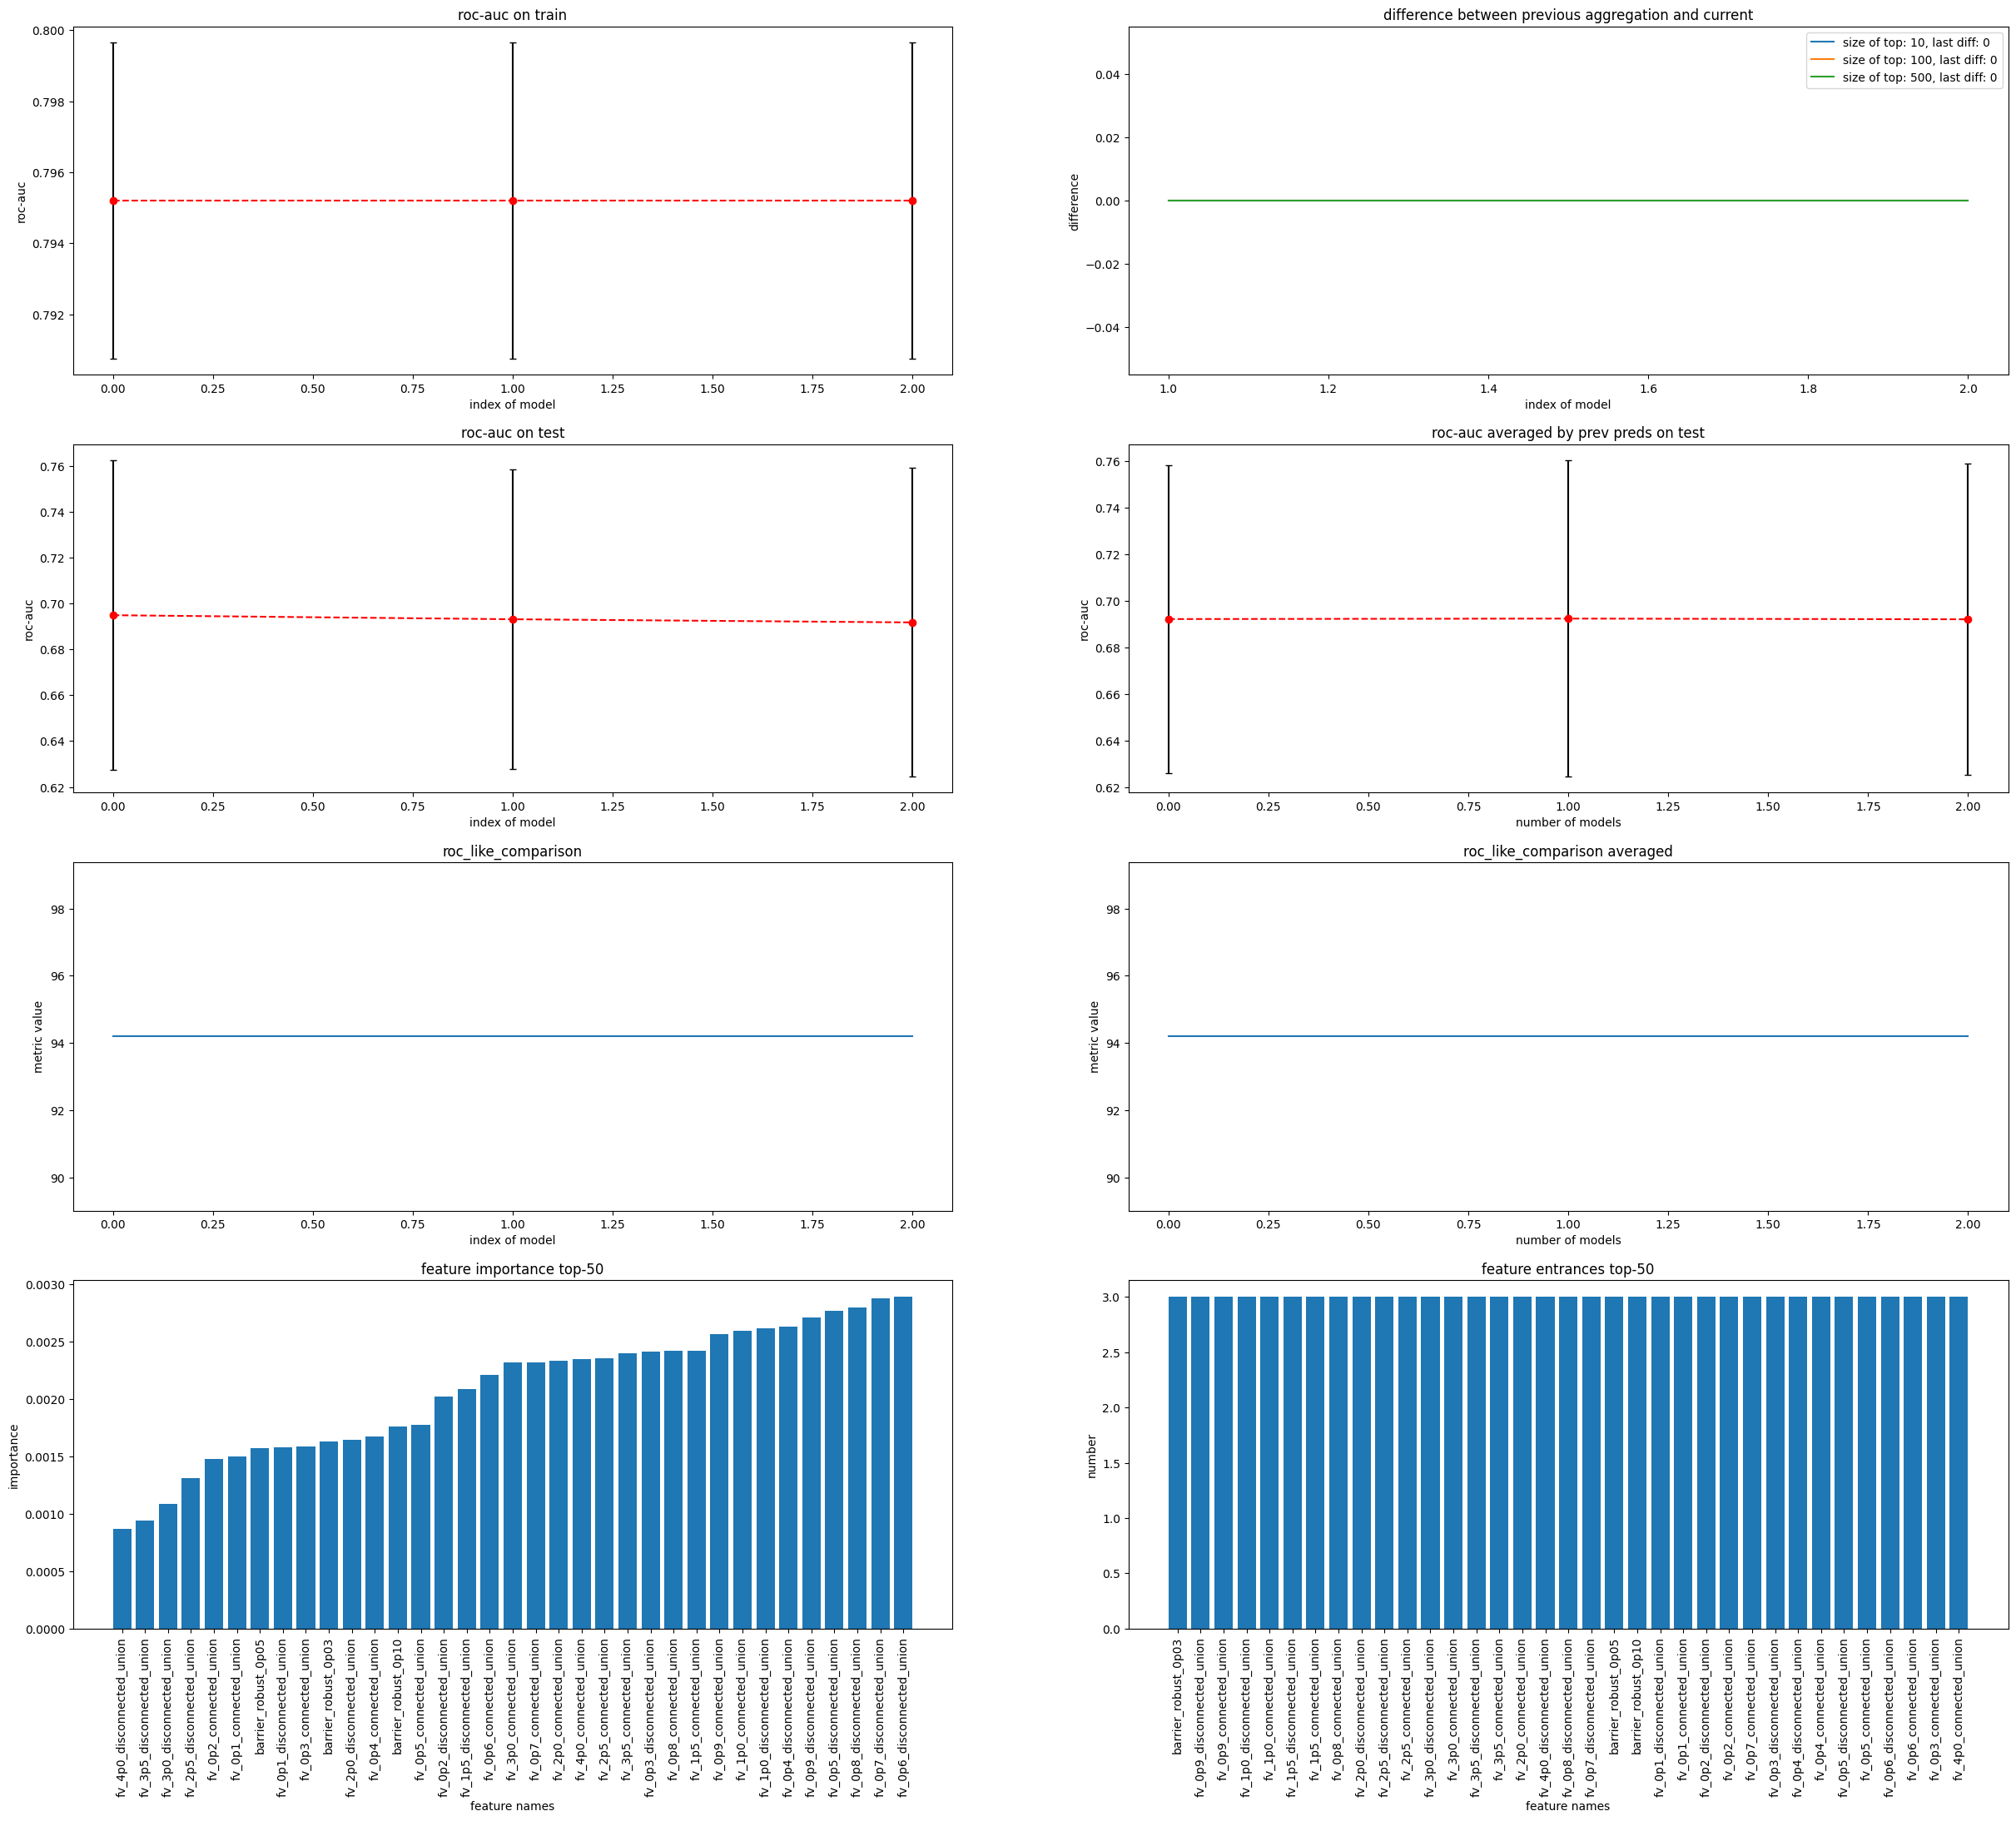

In [ ]:
pipeline_logreg_l2_liblinear.plot_statistics()

In [10]:
arr0 = np.load('predictions_regression_cv_check/nn_logreg_l2_liblinear_mpdb_0.npy', allow_pickle=True)
arr1 = np.load('predictions_regression_cv_check/nn_logreg_l2_liblinear_mpdb_1.npy', allow_pickle=True)
arr2 = np.load('predictions_regression_cv_check/nn_logreg_l2_liblinear_mpdb_2.npy', allow_pickle=True)

print(np.all(np.argsort(arr0)[::-1][:100] == np.argsort(arr1)[::-1][:100]))
print(np.all(np.argsort(arr0)[::-1][:100] == np.argsort(arr2)[::-1][:100]))

True
True


In [17]:
print(pipeline_catboost.show_results().to_markdown())

|    | statistic                                 |    result |
|---:|:------------------------------------------|----------:|
|  0 | mean train roc-auc averaged by 40 models  |  0.86918  |
|  1 | roc_auc on test by aggregated preds       |  0.709414 |
|  2 | mean test roc-auc averaged by 40 models   |  0.706952 |
|  3 | roc_like_comparison by aggregated preds   | 75.5135   |
|  4 | roc_like_comparison averaged by 40 models | 74.2962   |
|  5 | roc_like_comparison std                   |  4.0264   |


In [14]:
import warnings
warnings.filterwarnings("ignore")

params = {
        "max_depth": 2,
        "learning_rate" : 0.1,
        "iterations": 40,
    }

for i in range(3):
    pipeline_catboost = ModelEvaluation(df_kahle_fin_nn, preds_Kahle2020, model_name = 'catboost', params = params)
    pipeline_catboost.fit(X_kahle_nn, feature_weights_nn, thr_positive = 1e-1, thr_negative = 1e-2, threshold = 1e-2, feature_names = feature_names_nn)

    pipeline_catboost.evaluate(num_of_evaluations = 40, X_mpdb = X_mpdb_nn, X_exp = X_exp_nn)
    pipeline_catboost.get_aggregated_statistics()

    preds_catboost_kahle = pipeline_catboost.preds_kahle_averaged[-1]
    preds_catboost_mpdb = pipeline_catboost.preds_mpdb_averaged[-1]
    preds_catboost_exp = pipeline_catboost.preds_exp_averaged[-1]

    print(pipeline_catboost.show_results().to_markdown())
    # np.save(f'predictions_regression_cv_check/nn_catboost_kahle_{i}.npy', preds_logreg_kahle)
    # np.save(f'predictions_regression_cv_check/nn_catboost_mpdb_{i}.npy', preds_logreg_mpdb)
    # np.save(f'predictions_regression_cv_check/nn_catboost_exp_{i}.npy', preds_logreg_exp)


[3629  979 7984 8176 5908 2324 3691 8867 3440 7124 4377  268 6504 4826
 6970 2984 5686 5486 1543 8628 8152 7725 2979 9100  314 9740 2284 2935
 8081 1779 4093 9470 6404 1112 2772 3349 4381 2082 9378 7762]
[3629  979 7984 8176 5908 2324 3691 8867 3440 7124 4377  268 6504 4826
 6970 2984 5686 5486 1543 8628 8152 7725 2979 9100  314 9740 2284 2935
 8081 1779 4093 9470 6404 1112 2772 3349 4381 2082 9378 7762]


  0%|          | 0/40 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.8636806231742942
test roc-auc mean: 0.6991859256131101, std: 0.055990460935216944
mean train roc-auc: 0.8634674824063651


  0%|          | 0/1000 [00:00<?, ?it/s]

  2%|▎         | 1/40 [00:04<03:01,  4.66s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

  5%|▌         | 2/40 [00:09<03:00,  4.74s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

  8%|▊         | 3/40 [00:14<02:52,  4.67s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 10%|█         | 4/40 [00:18<02:48,  4.69s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 12%|█▎        | 5/40 [00:23<02:42,  4.65s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 15%|█▌        | 6/40 [00:29<02:53,  5.09s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 18%|█▊        | 7/40 [00:34<02:44,  5.00s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 20%|██        | 8/40 [00:38<02:35,  4.86s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 22%|██▎       | 9/40 [00:43<02:27,  4.76s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 25%|██▌       | 10/40 [00:47<02:21,  4.70s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 28%|██▊       | 11/40 [00:52<02:15,  4.67s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 30%|███       | 12/40 [00:57<02:11,  4.70s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 32%|███▎      | 13/40 [01:03<02:16,  5.07s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 35%|███▌      | 14/40 [01:07<02:07,  4.92s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 38%|███▊      | 15/40 [01:12<02:00,  4.82s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 40%|████      | 16/40 [01:16<01:53,  4.75s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 42%|████▎     | 17/40 [01:21<01:49,  4.75s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 45%|████▌     | 18/40 [01:26<01:43,  4.70s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 48%|████▊     | 19/40 [01:30<01:37,  4.66s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 50%|█████     | 20/40 [01:36<01:40,  5.03s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 52%|█████▎    | 21/40 [01:41<01:32,  4.89s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 55%|█████▌    | 22/40 [01:45<01:27,  4.87s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 57%|█████▊    | 23/40 [01:50<01:21,  4.77s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 60%|██████    | 24/40 [01:55<01:15,  4.71s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 62%|██████▎   | 25/40 [01:59<01:10,  4.67s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 65%|██████▌   | 26/40 [02:04<01:04,  4.64s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 68%|██████▊   | 27/40 [02:10<01:06,  5.09s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 70%|███████   | 28/40 [02:14<00:59,  4.94s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 72%|███████▎  | 29/40 [02:19<00:53,  4.83s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 75%|███████▌  | 30/40 [02:24<00:47,  4.75s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 78%|███████▊  | 31/40 [02:28<00:42,  4.69s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 80%|████████  | 32/40 [02:33<00:37,  4.72s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 82%|████████▎ | 33/40 [02:38<00:32,  4.68s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 85%|████████▌ | 34/40 [02:43<00:30,  5.05s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 88%|████████▊ | 35/40 [02:48<00:24,  4.90s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 90%|█████████ | 36/40 [02:53<00:19,  4.81s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 92%|█████████▎| 37/40 [02:57<00:14,  4.79s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 95%|█████████▌| 38/40 [03:02<00:09,  4.73s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 98%|█████████▊| 39/40 [03:06<00:04,  4.67s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 40/40 [03:11<00:00,  4.79s/it]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

|    | statistic                                |    result |
|---:|:-----------------------------------------|----------:|
|  0 | mean train roc-auc averaged by 3 models  |  0.795201 |
|  1 | roc_auc on test by aggregated preds      |  0.691312 |
|  2 | mean test roc-auc averaged by 3 models   |  0.692544 |
|  3 | roc_like_comparison by aggregated preds  | 94.1933   |
|  4 | roc_like_comparison averaged by 3 models | 94.1933   |
|  5 | roc_like_comparison std                  |  0        |
[5968 5070 3154 1792 8455 1663  573 8044 3856 8971 8226 3410 7875 2691
 8386 6361 3825 9173 9799 9413 8638 5130 8379 7474 8607 7003  773 4985
 7551  173 5528 4784 1210 8787 9628 6146 2832 1866 2607 4499]
[5968 5070 3154 1792 8455 1663  573 8044 3856 8971 8226 3410 7875 2691
 8386 6361 3825 9173 9799 9413 8638 5130 8379 7474 8607 7003  773 4985
 7551  173 5528 4784 1210 8787 9628 6146 2832 1866 2607 4499]


  0%|          | 0/40 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.8506978253813697
test roc-auc mean: 0.6987561179521167, std: 0.05901880505214327
mean train roc-auc: 0.8625653525596847


  0%|          | 0/1000 [00:00<?, ?it/s]

  2%|▎         | 1/40 [00:04<03:05,  4.75s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

  5%|▌         | 2/40 [00:09<02:56,  4.65s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

  8%|▊         | 3/40 [00:14<02:54,  4.71s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 10%|█         | 4/40 [00:20<03:07,  5.20s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 12%|█▎        | 5/40 [00:24<02:53,  4.97s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 15%|█▌        | 6/40 [00:29<02:44,  4.84s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 18%|█▊        | 7/40 [00:33<02:37,  4.76s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 20%|██        | 8/40 [00:38<02:32,  4.78s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 22%|██▎       | 9/40 [00:43<02:26,  4.72s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 25%|██▌       | 10/40 [00:47<02:20,  4.68s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 28%|██▊       | 11/40 [00:53<02:26,  5.06s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 30%|███       | 12/40 [00:58<02:17,  4.92s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 32%|███▎      | 13/40 [01:03<02:11,  4.88s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 35%|███▌      | 14/40 [01:07<02:04,  4.79s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 38%|███▊      | 15/40 [01:12<01:58,  4.73s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 40%|████      | 16/40 [01:16<01:52,  4.69s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 42%|████▎     | 17/40 [01:21<01:47,  4.66s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 45%|████▌     | 18/40 [01:27<01:51,  5.09s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 48%|████▊     | 19/40 [01:32<01:43,  4.94s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 50%|█████     | 20/40 [01:36<01:36,  4.82s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 52%|█████▎    | 21/40 [01:41<01:30,  4.74s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 55%|█████▌    | 22/40 [01:46<01:25,  4.75s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 57%|█████▊    | 23/40 [01:50<01:19,  4.70s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 60%|██████    | 24/40 [01:55<01:14,  4.66s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 62%|██████▎   | 25/40 [02:01<01:15,  5.04s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 65%|██████▌   | 26/40 [02:05<01:08,  4.90s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 68%|██████▊   | 27/40 [02:10<01:02,  4.79s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 70%|███████   | 28/40 [02:14<00:57,  4.79s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 72%|███████▎  | 29/40 [02:19<00:52,  4.73s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 75%|███████▌  | 30/40 [02:24<00:46,  4.69s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 78%|███████▊  | 31/40 [02:28<00:41,  4.65s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 80%|████████  | 32/40 [02:34<00:40,  5.03s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 82%|████████▎ | 33/40 [02:39<00:34,  4.95s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 85%|████████▌ | 34/40 [02:43<00:29,  4.84s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 88%|████████▊ | 35/40 [02:48<00:23,  4.76s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 90%|█████████ | 36/40 [02:53<00:18,  4.71s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 92%|█████████▎| 37/40 [02:57<00:14,  4.72s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 95%|█████████▌| 38/40 [03:02<00:09,  4.66s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 98%|█████████▊| 39/40 [03:08<00:05,  5.02s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 40/40 [03:12<00:00,  4.82s/it]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

|    | statistic                                |    result |
|---:|:-----------------------------------------|----------:|
|  0 | mean train roc-auc averaged by 3 models  |  0.795201 |
|  1 | roc_auc on test by aggregated preds      |  0.691312 |
|  2 | mean test roc-auc averaged by 3 models   |  0.692544 |
|  3 | roc_like_comparison by aggregated preds  | 94.1933   |
|  4 | roc_like_comparison averaged by 3 models | 94.1933   |
|  5 | roc_like_comparison std                  |  0        |
[8087 9381 1668 4865 1235 1029 7666 6930 2358 3239 2635 5748 1310  868
 3016 8877 5842 6759 4098 4998 1721 9423 5372 2397  208 1488 5512 2276
  545 3786 8171 7053 5300 1967 9891 1777 1074 1708 4217 3758]
[8087 9381 1668 4865 1235 1029 7666 6930 2358 3239 2635 5748 1310  868
 3016 8877 5842 6759 4098 4998 1721 9423 5372 2397  208 1488 5512 2276
  545 3786 8171 7053 5300 1967 9891 1777 1074 1708 4217 3758]


  0%|          | 0/40 [00:00<?, ?it/s]

roc-auc on train for 0 fold with size 118: 0.8631937682570594
test roc-auc mean: 0.7175400916203507, std: 0.05730030415916355
mean train roc-auc: 0.8699890929808951


  0%|          | 0/1000 [00:00<?, ?it/s]

  2%|▎         | 1/40 [00:06<03:55,  6.03s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

  5%|▌         | 2/40 [00:10<03:20,  5.29s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

  8%|▊         | 3/40 [00:15<03:03,  4.96s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 10%|█         | 4/40 [00:19<02:52,  4.80s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 12%|█▎        | 5/40 [00:24<02:45,  4.72s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 15%|█▌        | 6/40 [00:29<02:38,  4.66s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 18%|█▊        | 7/40 [00:33<02:32,  4.63s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 20%|██        | 8/40 [00:39<02:43,  5.10s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 22%|██▎       | 9/40 [00:44<02:32,  4.93s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 25%|██▌       | 10/40 [00:48<02:24,  4.82s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 28%|██▊       | 11/40 [00:53<02:17,  4.74s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 30%|███       | 12/40 [00:57<02:11,  4.69s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 32%|███▎      | 13/40 [01:02<02:07,  4.71s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 35%|███▌      | 14/40 [01:07<02:01,  4.67s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 38%|███▊      | 15/40 [01:13<02:05,  5.04s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 40%|████      | 16/40 [01:17<01:57,  4.90s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 42%|████▎     | 17/40 [01:22<01:51,  4.86s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 45%|████▌     | 18/40 [01:27<01:44,  4.77s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 48%|████▊     | 19/40 [01:31<01:39,  4.72s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 50%|█████     | 20/40 [01:36<01:33,  4.67s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 52%|█████▎    | 21/40 [01:40<01:28,  4.64s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 55%|█████▌    | 22/40 [01:46<01:30,  5.03s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 57%|█████▊    | 23/40 [01:51<01:23,  4.94s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 60%|██████    | 24/40 [01:56<01:17,  4.84s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 62%|██████▎   | 25/40 [02:00<01:11,  4.76s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 65%|██████▌   | 26/40 [02:05<01:05,  4.70s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 68%|██████▊   | 27/40 [02:09<01:00,  4.66s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 70%|███████   | 28/40 [02:14<00:56,  4.69s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 72%|███████▎  | 29/40 [02:20<00:55,  5.07s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 75%|███████▌  | 30/40 [02:25<00:49,  4.92s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 78%|███████▊  | 31/40 [02:29<00:43,  4.82s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 80%|████████  | 32/40 [02:34<00:38,  4.80s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 82%|████████▎ | 33/40 [02:39<00:33,  4.75s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 85%|████████▌ | 34/40 [02:43<00:28,  4.71s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 88%|████████▊ | 35/40 [02:48<00:23,  4.67s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 90%|█████████ | 36/40 [02:54<00:20,  5.04s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 92%|█████████▎| 37/40 [02:58<00:14,  4.91s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 95%|█████████▌| 38/40 [03:03<00:09,  4.86s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

 98%|█████████▊| 39/40 [03:08<00:04,  4.78s/it]

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 40/40 [03:12<00:00,  4.82s/it]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

|    | statistic                                |    result |
|---:|:-----------------------------------------|----------:|
|  0 | mean train roc-auc averaged by 3 models  |  0.795201 |
|  1 | roc_auc on test by aggregated preds      |  0.691312 |
|  2 | mean test roc-auc averaged by 3 models   |  0.692544 |
|  3 | roc_like_comparison by aggregated preds  | 94.1933   |
|  4 | roc_like_comparison averaged by 3 models | 94.1933   |
|  5 | roc_like_comparison std                  |  0        |


In [15]:
arr0 = np.load('predictions_regression_cv_check/nn_catboost_mpdb_0.npy', allow_pickle=True)
arr1 = np.load('predictions_regression_cv_check/nn_catboost_mpdb_1.npy', allow_pickle=True)
arr2 = np.load('predictions_regression_cv_check/nn_catboost_mpdb_2.npy', allow_pickle=True)

print(np.all(np.argsort(arr0)[::-1][:100] == np.argsort(arr1)[::-1][:100]))
print(np.all(np.argsort(arr0)[::-1][:100] == np.argsort(arr2)[::-1][:100]))

True
True
